In [4]:
# dataser generation using equation

In [31]:
import numpy as np
import pandas as pd

In [32]:
x=6*np.random.rand(200,1)-3

In [33]:
# x

In [34]:
y = 0.8*x** 2 +0.9 *x + 2+ np.random.randn(200,1)

In [35]:
# y

In [36]:
new_x = np.reshape(x,-1)
# new_x
new_y= np.reshape(y, -1)

In [37]:
# new_y

In [38]:
data = pd.DataFrame({
    "feature" : new_x,
    "Output" : new_y
})

In [39]:
import matplotlib.pyplot as plt

In [40]:
plt.scatter (x_train , y_train, color= "red", label= "Tarining Data")
plt.scatter (x_test , y_test, color= "green", label= "Tarining Data")
plt.plot (x_test,y_pred, label = "Predicted Line")
plt.legend()

NameError: name 'x_train' is not defined

In [41]:
# Applying Polynomial LR

In [42]:
data

,feature,Output
0,-1.967225,3.086203
1,1.809141,6.957753
2,0.188532,3.525966
3,-0.496381,2.593761
4,-1.333581,1.581752
...,...,...
195,1.375929,3.400684
196,-2.250616,3.392351
197,1.789914,7.022725
198,0.850682,5.101532


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_only = data.iloc[0:2]     # Just to print upper two rows of the dataframe

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [46]:
x_train.shape

(160, 1)

In [47]:
y_test.shape

(40, 1)

In [48]:

from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit (x_train , y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)

In [52]:
# y_pred

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_pred, y_test)

-1.824736187387082

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree = 3)   # Degreee is a HyperParameter

In [57]:
# x_train 

x_train_new = poly.fit_transform(x_train)
# x_train_new
x_test_new = poly.fit_transform(x_test)
# x_train_new

In [58]:
# x_train

In [59]:
df= pd.DataFrame({
    "feature1": x_train_new[:,0],
    "feature2": x_train_new[:,1],
    "feature3": x_train_new[:,2],
    "output" : y_train.reshape(-1)       # reshape(-1) argument is a placeholder that automatically calculates the size of one dimension 
                                            #based on the other dimensions.   In this case, it flattens the array into a 1D vector.
    
})

df

,feature1,feature2,feature3,output
0,1.0,1.649886,2.722124,6.262663
1,1.0,-2.728603,7.445274,7.845489
2,1.0,-0.135727,0.018422,4.276316
3,1.0,1.716454,2.946216,4.775530
4,1.0,-0.677620,0.459168,2.137037
...,...,...,...,...
155,1.0,-1.257260,1.580702,2.438511
156,1.0,-0.037635,0.001416,1.035572
157,1.0,-0.846351,0.716309,1.192811
158,1.0,1.942582,3.773626,7.335329


In [60]:
x_data = df.iloc[ : , 0:3]

x_data

,feature1,feature2,feature3
0,1.0,1.649886,2.722124
1,1.0,-2.728603,7.445274
2,1.0,-0.135727,0.018422
3,1.0,1.716454,2.946216
4,1.0,-0.677620,0.459168
...,...,...,...
155,1.0,-1.257260,1.580702
156,1.0,-0.037635,0.001416
157,1.0,-0.846351,0.716309
158,1.0,1.942582,3.773626


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
xyz = LinearRegression ()

In [63]:
xyz.fit (x_train_new ,y_train)

LinearRegression()

In [64]:
df_test= pd.DataFrame({
    "feature1": x_test_new[:,0],
    "feature2": x_test_new[:,1],
    "feature3": x_test_new[:,2],
    "output" : y_test.reshape(-1)
    
})

# df_test

In [65]:
x_data_test = df_test.iloc [ :, 0: 3]
# x_data_test

In [66]:
# y_pred_new = xyz.predict (x_train_new)

In [67]:
# r2_score (y_pred_new , y_test)  # Accuracy via PLR

In [68]:
r2_score (y_pred, y_test) 

-1.824736187387082

In [69]:
xyz.coef_

array([[ 0.        ,  0.93223048,  0.79056356, -0.00310966]])

In [70]:
xyz.intercept_

array([2.17314906])

In [71]:
x_new = np.linspace (-3,3,200).reshape(200,1)        #This code is just to print a single cureved line
x_new_poly = poly.fit_transform(x_new)
y_new = xyz.predict (x_new_poly)

NameError: name 'y_pred_new' is not defined

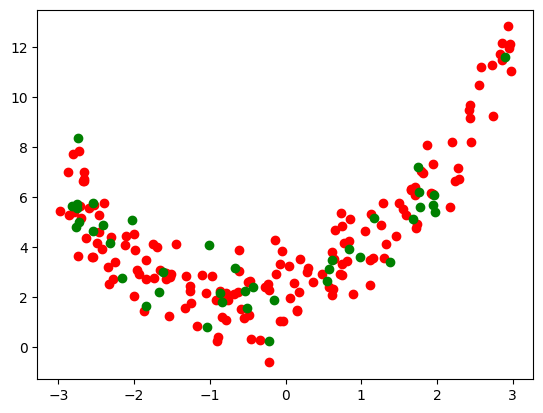

In [72]:
plt.scatter (x_train , y_train, color= "red", label= "Tarining Data")
plt.scatter (x_test , y_test, color= "green", label= "Tarining Data")
plt.plot (x_test,y_pred_new, label = "Predicted Line")
plt.legend()

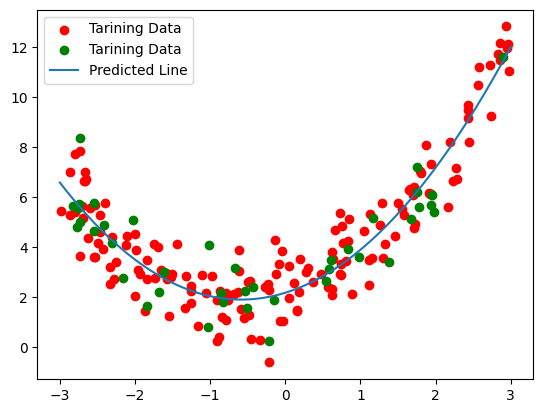

In [73]:
plt.scatter (x_train , y_train, color= "red", label= "Tarining Data")
plt.scatter (x_test , y_test, color= "green", label= "Tarining Data")
plt.plot (x_new,y_new, label = "Predicted Line")
plt.legend()

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [84]:
def polynomia_degree_checker (degree):
    x_new = np.linspace (-3,3,200).reshape(200,1)        #This code is just to print a single cureved line
    # x_new_poly = poly.fit_transform(x_new)

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

    poly = PolynomialFeatures(degree = degree)
    x_train_new = poly.fit_transform(x_train)
    # x_train_new
    x_test_new = poly.fit_transform(x_test)
    # x_tr#in_new
    
    # std_scaler = StandardScaler     #Standard Scaler instance
    lin_reg = LinearRegression()
    
    lin_reg.fit (x_train_new ,y_train)

    df_test= pd.DataFrame({
        "feature1": x_test_new[:,0],
        "feature2": x_test_new[:,1],
        "feature3": x_test_new[:,2],
        "output" : y_test.reshape(-1)
    
    })

    x_data_test = df_test.iloc [ :, 0: 3]
    y_pred_new = lin_reg.predict (x_data_test)
    print (r2_score (y_pred_new , y_test))  # Accuracy via PLR

    x_new = np.linspace (-3,3,200).reshape(200,1)        #This code is just to print a single cureved line
    x_new_poly = poly.fit_transform(x_new)
    y_new = lin_reg.predict (x_new_poly)


    plt.scatter (x_train , y_train, color= "red", label= "Tarining Data")
    plt.scatter (x_test , y_test, color= "green", label= "Tarining Data")
    plt.plot (x_new,y_new, label = "Predicted Line")
    plt.legend()

In [85]:
polynomia_degree_checker(3)

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

In [78]:
from sklearn.pipeline import Pipeline


In [79]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

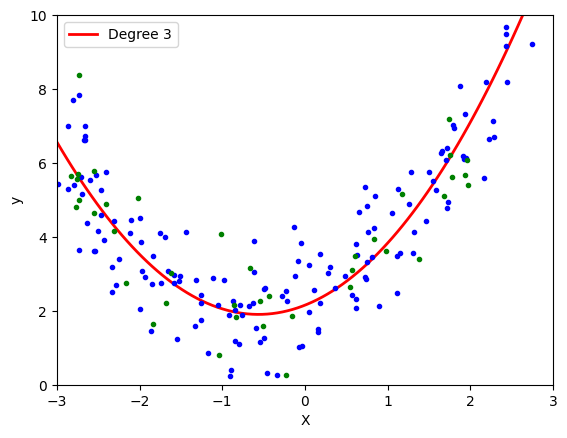

In [80]:
polynomial_regression(3)


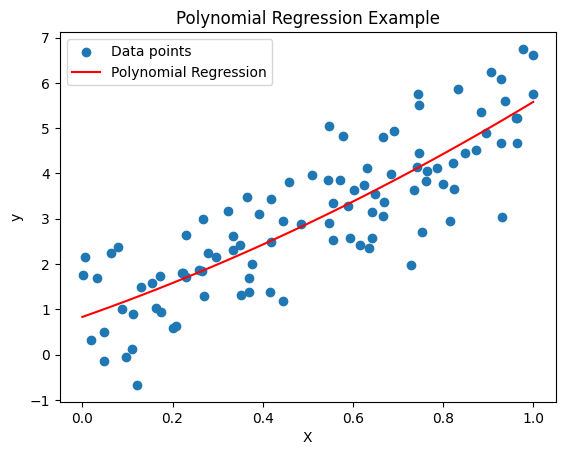

In [81]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some example data (you'll replace this with your own dataset)
X = np.random.rand(100, 1)  # Example feature (1D array)
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1)  # Example target (with noise)

# Create polynomial features (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Predictions
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, label="Data points")
plt.plot(X_new, y_pred, color='r', label="Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Example")
plt.legend()
plt.show()
